In [1]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import pandas_profiling

In [2]:
home = Path.cwd()
home

PosixPath('/Users/germanportes/Documents/general_assembly/projects/final_project')

In [3]:
stocks = pd.read_csv("../final_project/sp500_1.csv")
#stocks = pd.read_csv("../final_project/sp500_1.csv").profile_report()
stocks.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker
444662,2016-10-28,40.360001,39.500000,39.619999,39.810001,1100300.0,39.617397,0.021772,0.004796,TXT
216477,2016-07-05,30.317308,29.923077,30.048077,30.240385,33654900.0,27.494465,0.013175,0.006400,GE
485555,2017-07-19,62.770000,61.950001,62.139999,62.700001,2174200.0,58.353977,0.013236,0.009012,WEC
131403,2016-03-11,102.430000,98.129997,98.610001,102.059998,2723200.0,101.642593,0.043819,0.034986,CXO
94757,2018-10-09,71.269997,70.129997,70.800003,70.779999,1801000.0,70.779999,0.016256,-0.000283,KMX
121304,2016-02-12,51.250198,49.729256,50.151299,51.210384,1975800.0,50.495380,0.030584,0.021118,CTXS
200823,2018-10-05,95.989998,93.540001,95.959999,93.779999,1351300.0,93.063438,0.026192,-0.022718,FRC
464015,2017-11-13,145.720001,143.580002,145.190002,144.610001,1313900.0,144.610001,0.014905,-0.003995,URI
344728,2019-05-21,11.830000,11.640000,11.700000,11.800000,1877500.0,11.717884,0.016323,0.008547,NWSA
196414,2017-04-07,196.880005,195.369995,195.539993,195.649994,1612000.0,190.097122,0.007729,0.000563,FDX


In [4]:
# simple rolling average
stocks['SMA_5'] = stocks.iloc[:,1].rolling(window=5).mean()

In [5]:
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
335160,2017-05-31,102.180000,100.250000,100.750000,101.730003,851400.0,98.933891,0.019252,0.009727,MSCI,101.172002
430587,2016-11-10,141.839996,134.080002,134.210007,139.899994,1203100.0,139.899994,0.057876,0.042396,SIVB,129.057999
378594,2017-12-27,84.940002,84.309998,84.470001,84.620003,337800.0,79.749649,0.007472,0.001776,PNW,85.692001
138898,2017-07-28,153.300003,152.110001,152.669998,152.889999,2779500.0,149.234955,0.007823,0.001441,COST,152.992001
484780,2018-06-21,193.389999,191.479996,192.710007,192.990005,677100.0,192.990005,0.009975,0.001453,WAT,197.408002


In [6]:
# any missing data
stocks.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             4
dtype: int64

In [7]:
#size
stocks.shape

(505207, 11)

In [8]:
# Establish our target variables: "runs"
stocks['Close'].describe()

count    505207.000000
mean        106.499921
std         171.910724
min           1.740000
25%          44.410000
50%          72.330002
75%         116.739998
max        3766.270020
Name: Close, dtype: float64

In [9]:
# How many unique companies are there?
stocks['ticker'].nunique()

505

In [10]:
# Which stocks have the highest volume or traded daily?
stocks.sort_values(by = 'Volume', ascending=True).sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
165548,2018-10-12,27.280001,26.629999,27.110001,26.809999,2245000.0,26.059151,0.024409,-0.011066,DRE,28.220000
182649,2018-08-23,242.750000,241.399994,241.869995,242.169998,192200.0,233.890793,0.005592,0.001240,ESS,243.042001
144920,2017-06-21,34.299999,33.509998,33.770000,33.970001,3145000.0,33.018524,0.023575,0.005922,DHI,34.264000
187702,2018-09-12,44.459999,44.060001,44.250000,44.119999,4665600.0,42.798389,0.009078,-0.002938,EXC,44.562000
449148,2018-09-28,56.369999,55.820000,55.935001,56.009998,6800400.0,55.107155,0.009853,0.001341,TJX,55.853999
86562,2018-04-04,54.990002,53.320000,53.570000,54.709999,909500.0,53.323734,0.031320,0.021281,BF.B,54.542001
188156,2016-06-30,106.459999,103.930000,105.540001,106.300003,2336800.0,102.998184,0.024343,0.007201,EXPE,104.349998
240262,2019-01-22,44.259998,43.020000,43.880001,44.189999,2061800.0,44.189999,0.028824,0.007065,HOLX,43.689999
129426,2016-05-06,42.439999,41.709999,41.980000,42.279999,926200.0,39.137180,0.017502,0.007146,CMA,43.430000
47379,2018-10-05,157.940002,155.309998,157.169998,155.520004,1003300.0,153.993591,0.016934,-0.010498,AON,157.154001


In [11]:
stocks_volume=stocks.groupby('ticker')['Volume'].sum().sort_values(ascending=False)
stocks_volume.head()

ticker
BAC     7.998436e+10
GE      6.550756e+10
AMD     5.947630e+10
F       3.855452e+10
AAPL    3.329668e+10
Name: Volume, dtype: float64

In [12]:
apple = stocks.loc[stocks['ticker'].isin(['GE'])]
apple.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
216364,2016-01-22,27.461538,26.644230,27.451923,27.153847,91384100.0,24.307981,0.030675,-0.010858,GE,27.621154
216432,2016-04-29,29.778847,29.423077,29.567308,29.567308,30058700.0,26.680386,0.012092,0.000000,GE,29.815385
216763,2017-08-22,23.788462,23.538462,23.625000,23.653847,31167800.0,22.389925,0.010621,0.001221,GE,23.928846
216603,2017-01-03,30.615385,30.192308,30.451923,30.471153,33435400.0,28.130621,0.014013,0.000631,GE,30.680770
217292,2019-09-30,9.100000,8.940000,9.080000,8.940000,35091400.0,8.940000,0.017897,-0.015419,GE,9.206000


In [13]:
# any missing data
apple.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             0
dtype: int64

In [14]:
# size
apple.shape

(1008, 11)

In [15]:
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
216287,2015-10-01,24.336538,23.836538,24.182692,24.221153,41312500.0,21.521675,0.020976,0.001590,GE,151.669307
216288,2015-10-02,24.509615,23.875000,23.913462,24.490385,44383200.0,21.760902,0.026581,0.024125,GE,119.193230
216289,2015-10-05,26.153847,25.211538,25.355770,25.788462,109640200.0,22.914310,0.037376,0.017065,GE,87.559998
216290,2015-10-06,26.355770,25.923077,25.951923,26.240385,74785700.0,23.315865,0.016691,0.011115,GE,55.923153
216291,2015-10-07,26.701923,26.269230,26.442308,26.701923,68297800.0,23.725962,0.016471,0.009818,GE,25.611539


In [16]:
# establish target variable: High
apple['Close'].describe()

count    1008.000000
mean       20.215602
std         8.536657
min         6.451923
25%        11.853365
50%        23.139422
75%        28.701923
max        31.663462
Name: Close, dtype: float64

In [17]:
apple_stock = apple[['Low', 'High','Open','SMA_5', 'Volume', 'daily_pct_chng',]]

In [18]:
apple_stock.sample(5)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
216573,29.480770,29.682692,29.519230,29.623077,18547400.0,0.002932
216769,23.221153,23.548077,23.548077,23.607692,35231000.0,-0.008575
217073,7.663462,8.701923,7.711538,8.703846,214048600.0,0.073566
216395,28.817308,29.057692,28.923077,29.200000,32393800.0,-0.000665
216435,28.740385,29.250000,29.230770,29.675000,41386300.0,-0.010855


In [19]:
#apple_stock['ticker'] = apple['ticker']

In [19]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
216287,23.836538,24.336538,24.182692,151.669307,41312500.0,0.001590
216288,23.875000,24.509615,23.913462,119.193230,44383200.0,0.024125
216289,25.211538,26.153847,25.355770,87.559998,109640200.0,0.017065
216290,25.923077,26.355770,25.951923,55.923153,74785700.0,0.011115
216291,26.269230,26.701923,26.442308,25.611539,68297800.0,0.009818


In [21]:
#apple.to_csv('BAC.csv')

In [20]:
# standardize variables
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [21]:
#std_scaler.fit(stock_high)
std_scaler.fit(apple_stock)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_stock =std_scaler.transform(apple_stock)

In [23]:
import pickle
filename = open('GE_fitted_scaler.pkl', 'wb')
pickle.dump(scaled_stock, filename)
filename.close()

In [24]:
#scaled_df=pd.DataFrame(scaled_stock, columns = stock_high.columns)
scaled_df=pd.DataFrame(scaled_stock, columns = apple_stock.columns)
scaled_df.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
0,0.446300,0.460194,0.465262,12.784521,-0.469484,0.140191
1,0.450818,0.480470,0.433639,9.613112,-0.408591,1.560255
2,0.607799,0.673101,0.603051,6.524011,0.885470,1.115322
3,0.691372,0.696758,0.673075,3.434556,0.194297,0.740403
4,0.732030,0.737311,0.730675,0.474516,0.065641,0.658667


In [25]:
scaled_df.mean() 

Low               3.720569e-16
High              2.806397e-16
Open             -3.639064e-16
SMA_5            -6.674555e-16
Volume            1.789243e-16
daily_pct_chng   -1.044689e-16
dtype: float64

In [26]:
scaled_df.std()

Low               1.000496
High              1.000496
Open              1.000496
SMA_5             1.000496
Volume            1.000496
daily_pct_chng    1.000496
dtype: float64

In [27]:
# target variable
#y = top_5['Close']
y = apple['Close']
y.shape
y.head

<bound method NDFrame.head of 216287    24.221153
216288    24.490385
216289    25.788462
216290    26.240385
216291    26.701923
            ...    
217290     9.020000
217291     9.040000
217292     8.940000
217293     8.610000
217294     8.510000
Name: Close, Length: 1008, dtype: float64>

In [28]:
X= apple.drop('Close', axis=1)
X = scaled_df.copy()
X.shape
X.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
970,-1.282217,-1.280330,-1.262879,-1.088289,0.232671,-2.089404
3,0.691372,0.696758,0.673075,3.434556,0.194297,0.740403
536,-0.377008,-0.320467,-0.397611,-0.171877,1.688644,2.739104
229,1.166836,1.151861,1.146300,0.924286,-0.850496,0.403752
420,0.765911,0.756462,0.772463,0.569916,-0.525496,0.062576
39,1.068581,1.061742,1.085311,0.862501,-0.171763,-0.535895
476,0.411290,0.395983,0.399756,0.310195,-0.670656,0.116910
80,0.788498,0.828557,0.809734,0.661936,-0.337643,-0.406957
436,0.752358,0.727173,0.740840,0.606536,-0.700920,0.085645
0,0.446300,0.460194,0.465262,12.784521,-0.469484,0.140191


In [29]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=42)

In [30]:
# instantiate
mystock= LinearRegression()
#linreg=LinearRegression()
mystock.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# pickle final model
filename = open('GE_final_model.pkl', 'wb')
pickle.dump(mystock, filename)
filename.close()

In [32]:
# fit model  to training dataset
mystock.fit(X_train, y_train)  # normalize = False, data is expected to be already centered
y_pred = mystock.predict(X_test)

In [33]:
# predict the y_values on testing dataset
y_pred = mystock.predict(X_test)
y_pred

array([10.16099304, 12.76982127, 12.66357868, 22.39489299, 28.54957966,
       14.04576544, 14.04106863, 19.40329678, 30.26384814, 27.49597778,
        7.54168526, 28.44158515, 10.2637773 , 24.5276929 , 28.76351769,
       13.85674161, 12.57605393,  7.86391753, 29.9379864 , 28.30568168,
       10.24460523, 14.14068836, 30.12917683, 29.15707687, 13.93065761,
       29.22426579, 28.7291374 , 29.60076498, 28.63983799,  9.16624887,
       12.50394243,  8.50527171, 27.81688485, 28.57072266, 12.14922991,
       27.50723894, 10.20061419, 29.94080723, 27.780967  , 28.48317919,
       23.25660713, 19.41463524, 29.1849808 , 10.09347276, 30.56090933,
       29.73715158, 28.87281427,  9.55734054,  8.00116464,  9.84995596,
       13.33584763, 10.67992145, 29.62412118, 13.00680145, 17.15684988,
       12.28128788, 28.97444145, 29.53168267, 28.415472  , 29.29893305,
        9.31214924, 27.67676022, 26.8824075 , 10.11278448,  7.10526173,
       23.34063499, 25.01160301, 31.56578922, 24.04764596, 10.80

In [34]:
#looking at prediction and comparing to true values
[round(x,2)for x in y_pred[:5]]

[10.16, 12.77, 12.66, 22.39, 28.55]

In [35]:
list(y_test[:5])

[10.220000267028807,
 12.769230842590332,
 12.692307472229006,
 22.461538314819336,
 28.61538505554199]

In [36]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 0.08326393499775


In [37]:
avg_val= y_train.mean()
avg_val

20.21460013077638

In [38]:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip = sqrt(metrics.mean_squared_error(y_test, comparison_array))
print ('Close', round(rmse-coin_flip))

Close -9


In [39]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.9999087464163945

In [40]:
comparison = np.full(len(y_test), avg_val)
comparison

array([20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21460013,
       20.21460013, 20.21460013, 20.21460013, 20.21460013, 20.21

In [41]:
sqrt(metrics.mean_squared_error(y_test, comparison))

8.716298471047647

In [42]:
y_pred

array([10.16099304, 12.76982127, 12.66357868, 22.39489299, 28.54957966,
       14.04576544, 14.04106863, 19.40329678, 30.26384814, 27.49597778,
        7.54168526, 28.44158515, 10.2637773 , 24.5276929 , 28.76351769,
       13.85674161, 12.57605393,  7.86391753, 29.9379864 , 28.30568168,
       10.24460523, 14.14068836, 30.12917683, 29.15707687, 13.93065761,
       29.22426579, 28.7291374 , 29.60076498, 28.63983799,  9.16624887,
       12.50394243,  8.50527171, 27.81688485, 28.57072266, 12.14922991,
       27.50723894, 10.20061419, 29.94080723, 27.780967  , 28.48317919,
       23.25660713, 19.41463524, 29.1849808 , 10.09347276, 30.56090933,
       29.73715158, 28.87281427,  9.55734054,  8.00116464,  9.84995596,
       13.33584763, 10.67992145, 29.62412118, 13.00680145, 17.15684988,
       12.28128788, 28.97444145, 29.53168267, 28.415472  , 29.29893305,
        9.31214924, 27.67676022, 26.8824075 , 10.11278448,  7.10526173,
       23.34063499, 25.01160301, 31.56578922, 24.04764596, 10.80

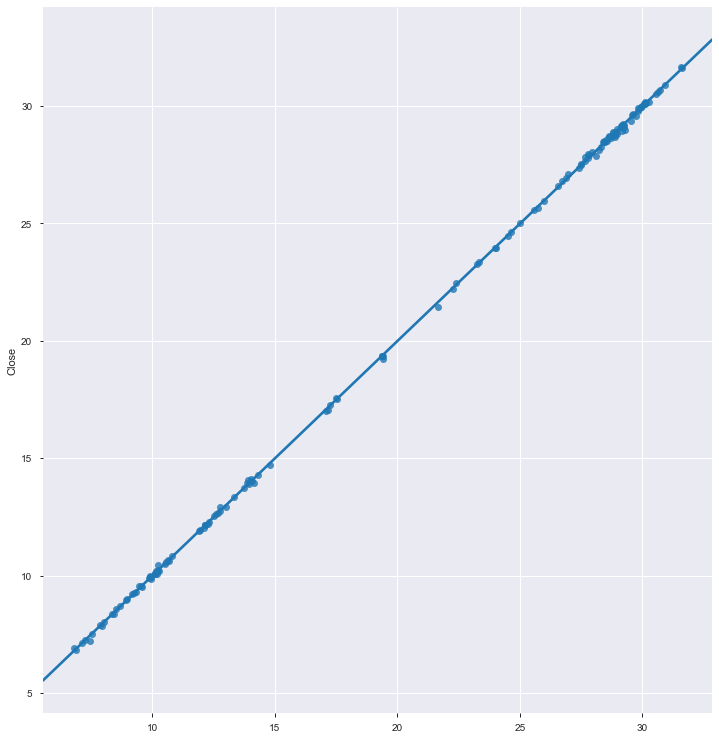

In [43]:
plt.figure(figsize = (12,13))
sns.regplot(x=y_pred, y=y_test);

In [44]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
216287,23.836538,24.336538,24.182692,151.669307,41312500.0,0.001590,GE
216288,23.875000,24.509615,23.913462,119.193230,44383200.0,0.024125,GE
216289,25.211538,26.153847,25.355770,87.559998,109640200.0,0.017065,GE
216290,25.923077,26.355770,25.951923,55.923153,74785700.0,0.011115,GE
216291,26.269230,26.701923,26.442308,25.611539,68297800.0,0.009818,GE


In [ ]:
# # pickle final model
# filename = open('AAPL_final_model.pkl', 'wb')
# pickle.dump(apple_stock, filename)
# filename.close()

In [46]:
X_test.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
922,-1.266948,-1.273301,-1.282848,-1.099812,-0.351266,1.598422
72,0.841578,0.904032,0.822157,0.722969,0.056688,1.709413
528,-0.110478,-0.100801,-0.125422,-0.110092,0.110806,0.735925
877,-1.202349,-1.218238,-1.205324,-1.036142,-0.392406,-0.402915
63,1.123920,1.156367,1.110158,0.909450,-0.209956,0.632146
259,0.886753,0.879250,0.871852,0.729354,-0.650587,0.412583
294,1.119402,1.131584,1.146300,0.920342,-0.347532,-0.808870
290,1.167965,1.143976,1.153076,0.889356,-0.788126,0.241681
198,1.344146,1.320835,1.324748,1.037151,-0.416168,0.270795
811,-1.522185,-1.510045,-1.511215,-1.315176,2.472037,-1.689881


In [47]:
y_test.head(10)

217225    10.220000
216917    12.769231
216969    12.692307
216801    22.461538
216652    28.615385
216942    14.057693
216943    14.125000
216816    19.355770
216608    30.163462
216357    27.538462
Name: Close, dtype: float64

In [48]:
stock_filter = apple.loc[apple['ticker']=='GE']
#stock_filter = top_5.loc[top_5['ticker']]
print(len(stock_filter))
print (stock_filter.head())

1008
              Date       High        Low       Open      Close       Volume  \
216287  2015-10-01  24.336538  23.836538  24.182692  24.221153   41312500.0   
216288  2015-10-02  24.509615  23.875000  23.913462  24.490385   44383200.0   
216289  2015-10-05  26.153847  25.211538  25.355770  25.788462  109640200.0   
216290  2015-10-06  26.355770  25.923077  25.951923  26.240385   74785700.0   
216291  2015-10-07  26.701923  26.269230  26.442308  26.701923   68297800.0   

        Adj Close  HL_pct_diff  daily_pct_chng ticker       SMA_5  
216287  21.521675     0.020976        0.001590     GE  151.669307  
216288  21.760902     0.026581        0.024125     GE  119.193230  
216289  22.914310     0.037376        0.017065     GE   87.559998  
216290  23.315865     0.016691        0.011115     GE   55.923153  
216291  23.725962     0.016471        0.009818     GE   25.611539  


In [49]:
stock_filter['Close'].mean()

20.215601744632874

In [50]:
print ('actual high', y_test[217225])
print ('predicted', round(y_pred[0]))
## talk to austin about this

actual high 10.220000267028807
predicted 10.0


In [51]:
# predict the y-values
y_pred = mystock.predict(X_test)
for i in y_pred[:5]:
    print(round(i,0))

10.0
13.0
13.0
22.0
29.0


In [52]:
# How similar are those to the actual high prices?
for i in y_test[:5]:
    print(round(i,0))

10.0
13.0
13.0
22.0
29.0


In [53]:
# the residuals are the difference between true y values and predicted y values.
residuals= y_test - y_pred
for i in residuals[:5]:
    print(round(i,0))

0.0
-0.0
0.0
0.0
0.0


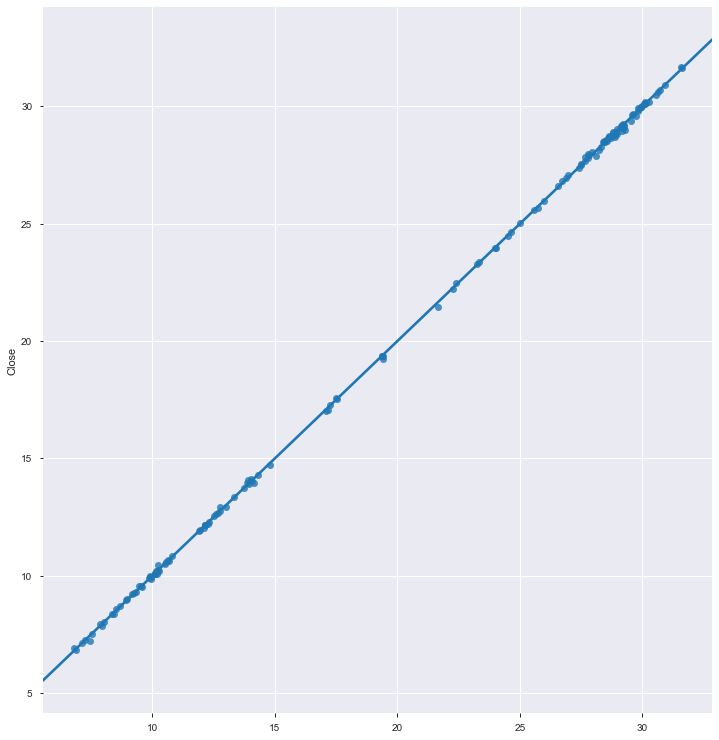

In [54]:
# Use a scatter plot to compare our predictions to the actual values
# Remember: when x==y, that indicates an accurate model! 
# Do we have that?
plt.figure(figsize=(12, 13))
sns.regplot(y_pred, y_test);

In [55]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
216287,23.836538,24.336538,24.182692,151.669307,41312500.0,0.001590,GE
216288,23.875000,24.509615,23.913462,119.193230,44383200.0,0.024125,GE
216289,25.211538,26.153847,25.355770,87.559998,109640200.0,0.017065,GE
216290,25.923077,26.355770,25.951923,55.923153,74785700.0,0.011115,GE
216291,26.269230,26.701923,26.442308,25.611539,68297800.0,0.009818,GE


In [57]:
apple.to_csv('GE.csv')

In [59]:
file = open('/Users/germanportes/Documents/general_assembly/projects/final_project/F_final_model.pkl', 'rb')
GE=pickle.load(file)
file.close()
print (GE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
